In [1]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib.patches import Patch
 
DATA_PATH = os.path.join('..', '..', '..', 'data', 'Japan')
PATH_ESTIMATED = os.path.join('..', '..','..','estimated/Japan/')
PATH_SHAPEFILE = os.path.join('..', '..','..', 'data/Japan/shapefiles')

In [2]:
mydtypes = {'KEY_CODE': 'string'} 
df_DHS_NL = pd.read_csv(os.path.join(PATH_ESTIMATED, 'JP_estimated_NL_2000_2022.csv'), sep=",", quotechar='"', dtype=mydtypes, encoding="utf-8") 

print(df_DHS_NL.shape) #(411, 26)
print(df_DHS_NL.columns)


(411, 26)
Index(['KEY_CODE', 'lon', 'lat', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')


In [3]:
df_DHS_NL.sample(5)

,KEY_CODE,lon,lat,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
107,2406003048,41.003305,141.248001,0.731496,0.774126,0.807050,0.802727,0.774979,0.774979,0.708118,...,0.454730,0.421608,0.406344,0.426143,0.463257,0.489016,0.472777,0.478711,0.483418,0.496043
360,5303002013,40.330081,140.740952,1.086480,1.131144,1.135971,1.125031,1.074815,1.074815,1.052861,...,0.955596,0.947961,0.948692,0.952980,0.966521,0.980671,0.983327,0.979080,0.976529,0.977709
295,3301009012,39.731482,140.937637,0.752329,0.842827,0.888380,0.863852,0.835143,0.835143,0.826367,...,0.068141,0.052040,0.012442,0.107549,0.189746,0.260349,0.247892,0.272372,0.342651,0.362065
399,5303001032,40.389210,140.749146,0.557289,0.605688,0.544897,0.606162,0.667057,0.667057,0.461821,...,0.125117,0.093877,0.095535,0.144988,0.208756,0.254658,0.250918,0.297519,0.337381,0.370941
326,5303004002,40.306763,140.757324,0.993193,1.071683,1.084943,1.063219,0.993407,0.993407,0.956143,...,0.656267,0.630876,0.627867,0.665135,0.686727,0.703585,0.702695,0.705732,0.715008,0.727420


In [4]:
gdp_muni = gpd.read_file(os.path.join(PATH_SHAPEFILE,'KitaTohoku_municip/KitaTohoku_Japan_municip.dbf'), dtype={'JCODE2': 'string'},encoding='utf-8')
#CT: census tracts
gdp_CT = gpd.read_file(os.path.join(PATH_SHAPEFILE,'KitaTohoku_census2015/KitaTohoku_census2015.dbf'), dtype={'KEY_CODE': 'string'}, encoding='utf-8')
gdp_CT['KEY_CODE']= gdp_CT['KEY_CODE'].str[1:]

### filtered mirrors, treated municipalities

In [5]:
gpd_DHS_NL_merged = pd.merge(gdp_CT[['KEY_CODE','geometry']], df_DHS_NL,  how='right', left_on='KEY_CODE', right_on='KEY_CODE') 


In [6]:
gpd_DHS_NL_merged.sample(5)

,KEY_CODE,geometry,lon,lat,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
68,54630090,"POLYGON ((140.44047 39.18135, 140.44294 39.179...",140.435365,39.179511,1.107950,1.141894,1.151665,1.144991,1.125238,1.125238,...,0.683268,0.671561,0.678146,0.703314,0.713818,0.726586,0.710935,0.707099,0.703139,0.709786
163,2406001005,"POLYGON ((141.27697 41.13235, 141.27740 41.132...",41.131591,141.276062,0.553502,0.580119,0.588635,0.563944,0.691549,0.691549,...,0.344062,0.323023,0.327868,0.352473,0.390469,0.432364,0.441993,0.467938,0.488836,0.505307
335,24430040,"POLYGON ((141.11120 40.28360, 141.11088 40.283...",40.301703,141.103638,0.523386,0.554153,0.317536,0.621548,0.586974,0.586974,...,0.086419,0.029176,0.006276,0.067635,0.178073,0.254512,0.246892,0.277627,0.354678,0.387202
367,5303002012,"POLYGON ((140.74012 40.32968, 140.74082 40.328...",40.328622,140.739410,1.080312,1.127133,1.132675,1.120815,1.072129,1.072129,...,0.926274,0.914904,0.919119,0.932602,0.950599,0.964905,0.966775,0.962911,0.959294,0.962154
390,5303002006,"POLYGON ((140.73888 40.33395, 140.73789 40.333...",40.334160,140.738022,1.092262,1.131313,1.138103,1.130410,1.087367,1.087367,...,0.930086,0.917711,0.917286,0.916749,0.926052,0.932838,0.931784,0.925558,0.924764,0.923518


### plot Wealth index estimated

In [7]:
gpd_DHS_NL_merged['2020'].describe()

count    427.000000
mean       0.513997
std        0.264293
min       -0.265247
25%        0.384329
50%        0.502799
75%        0.676338
max        0.995197
Name: 2020, dtype: float64

#### Nightlight - NL

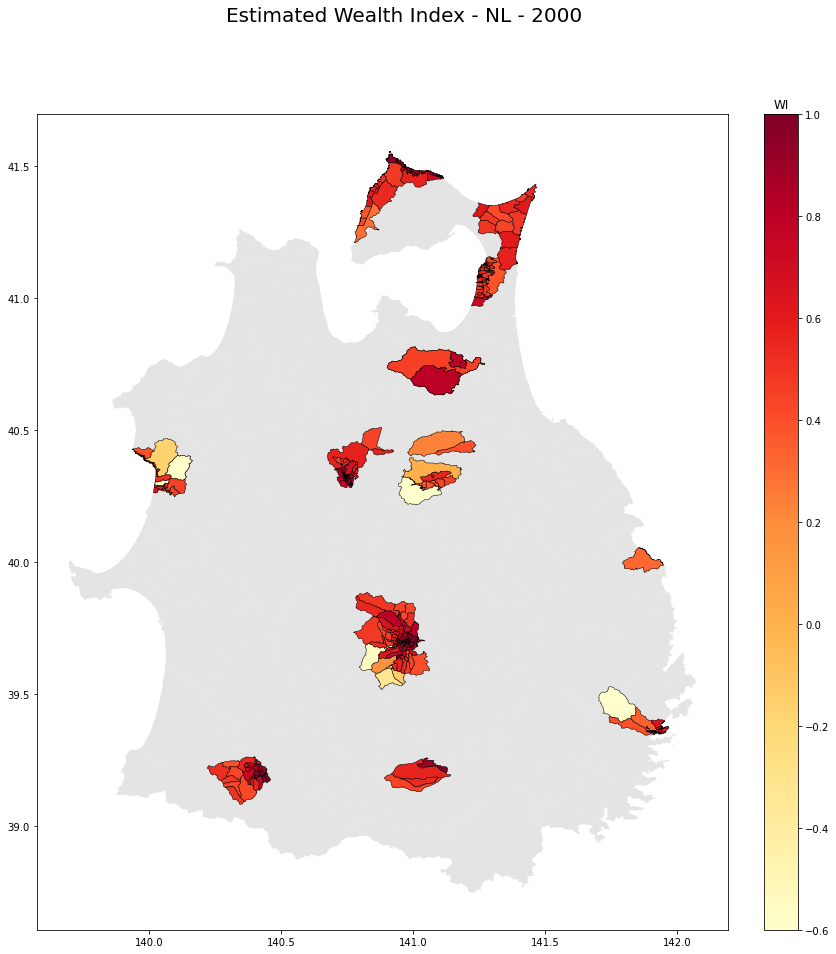

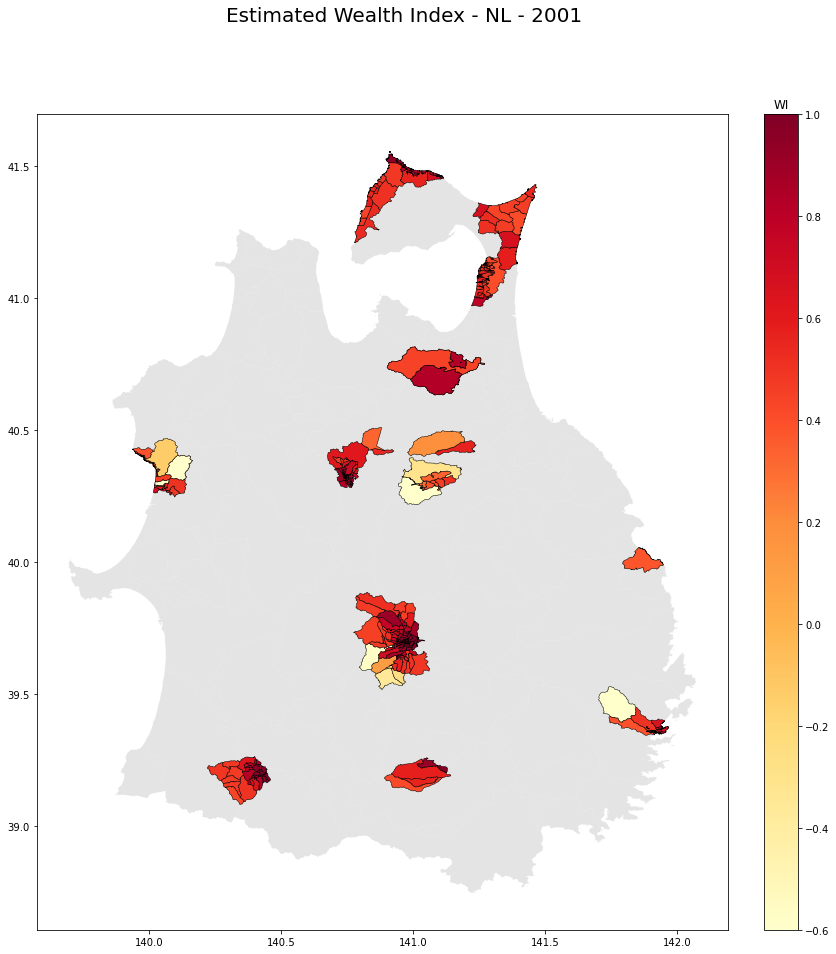

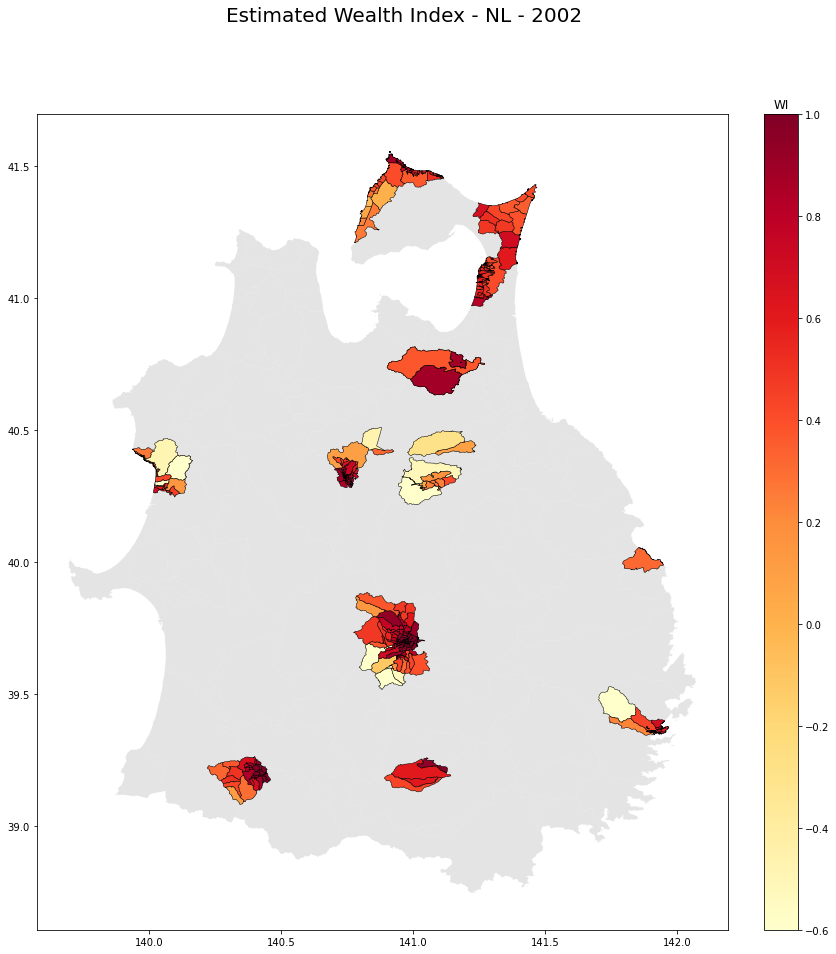

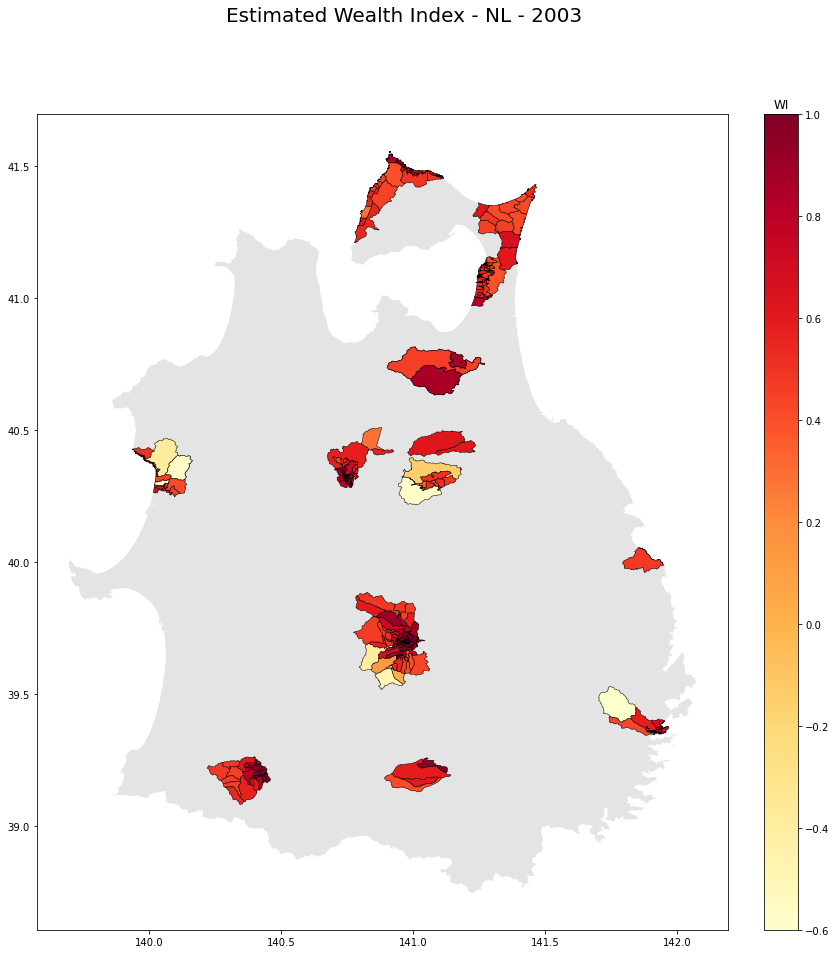

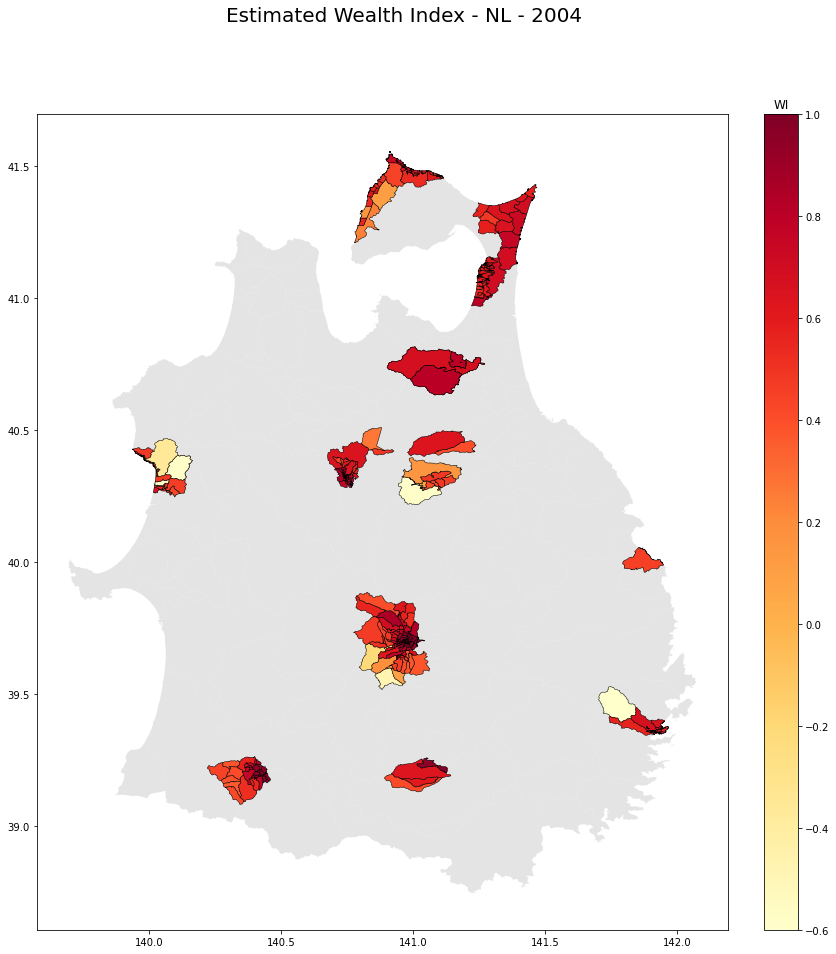

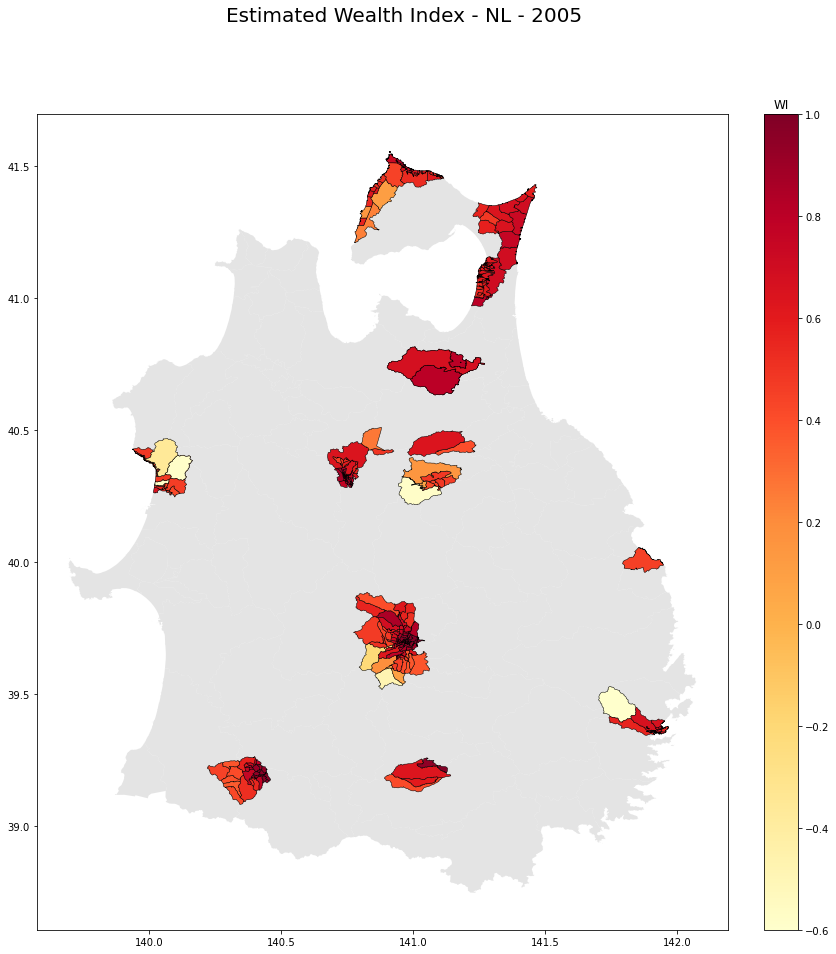

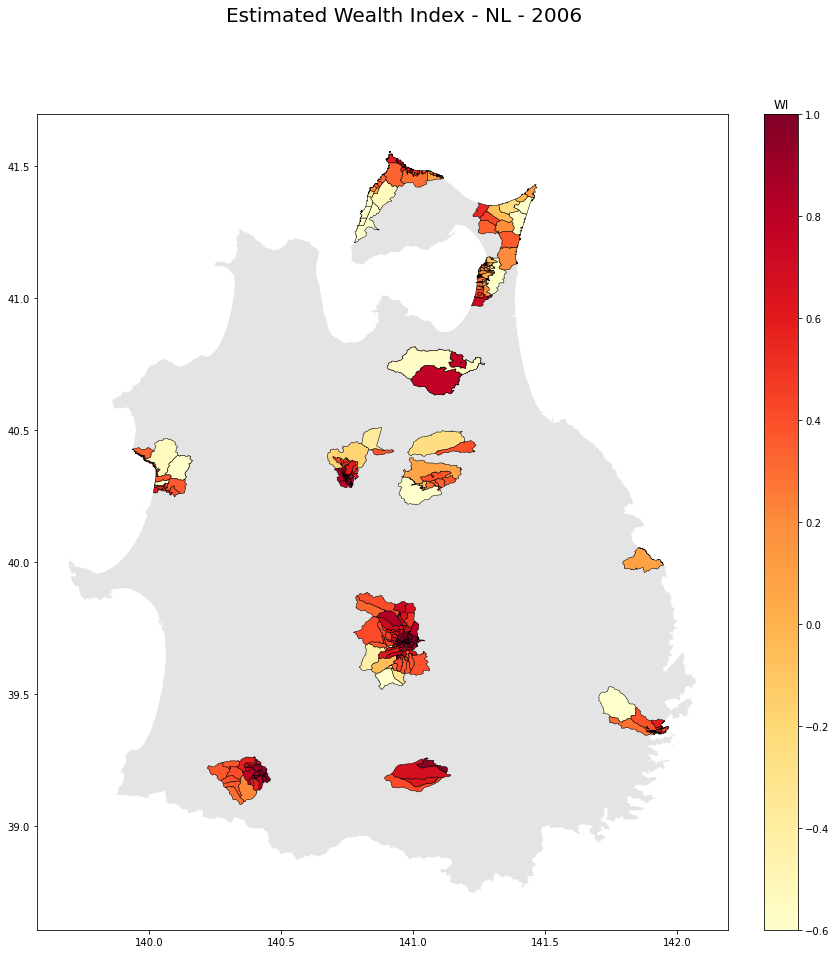

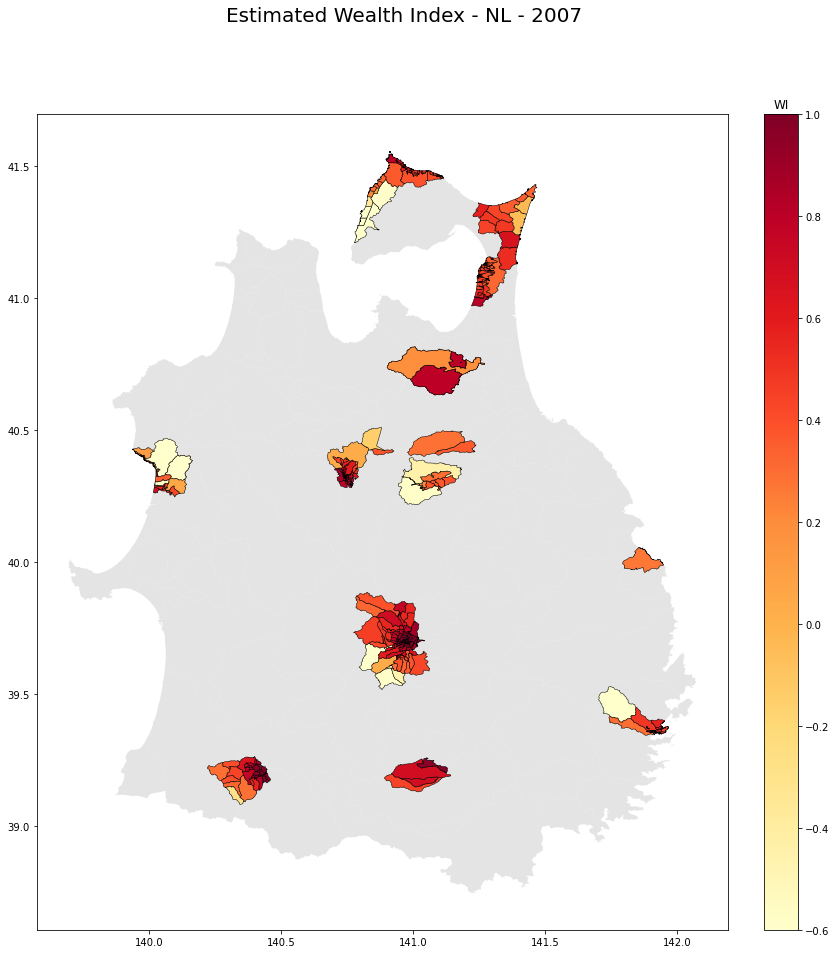

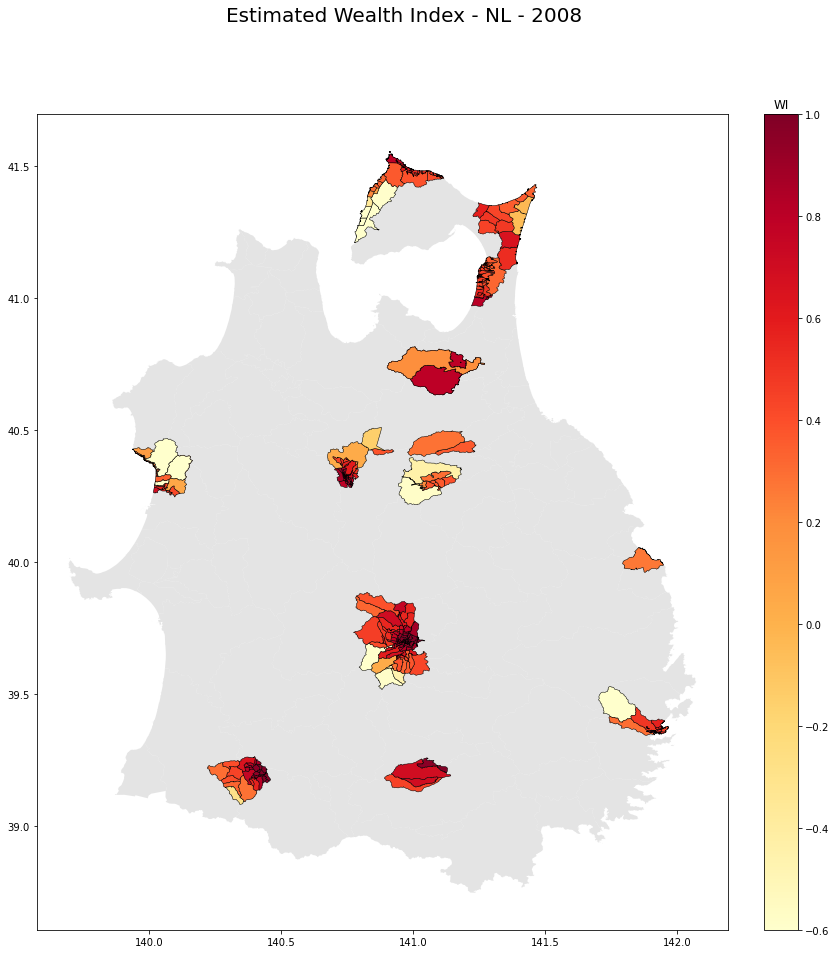

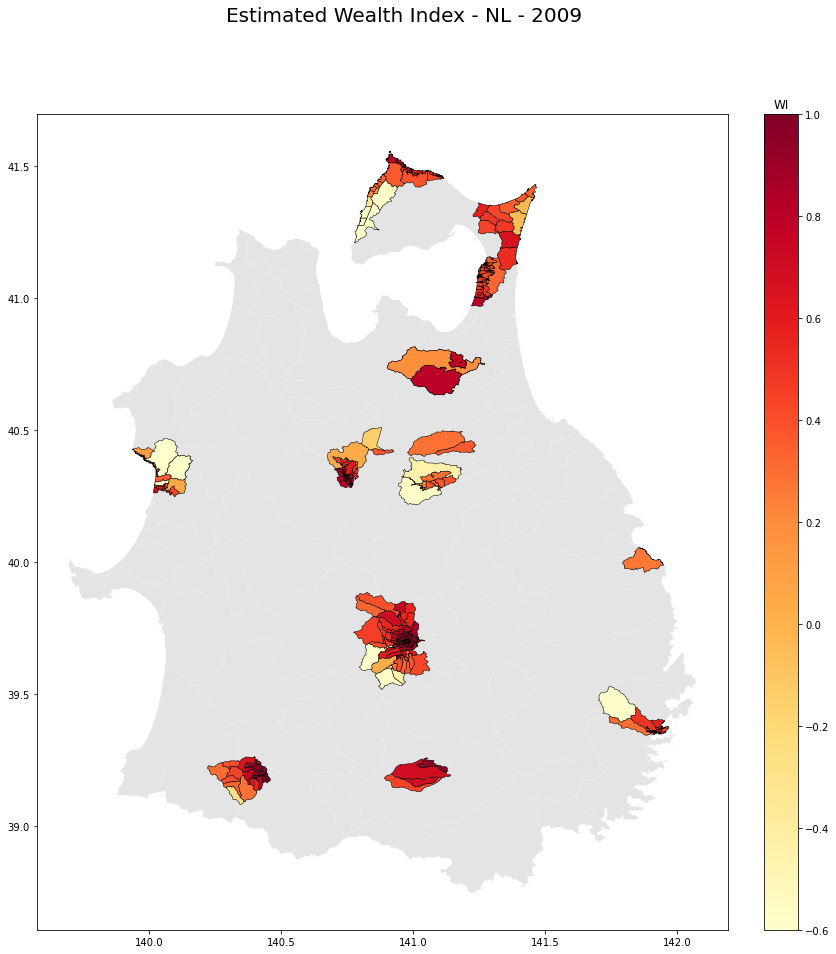

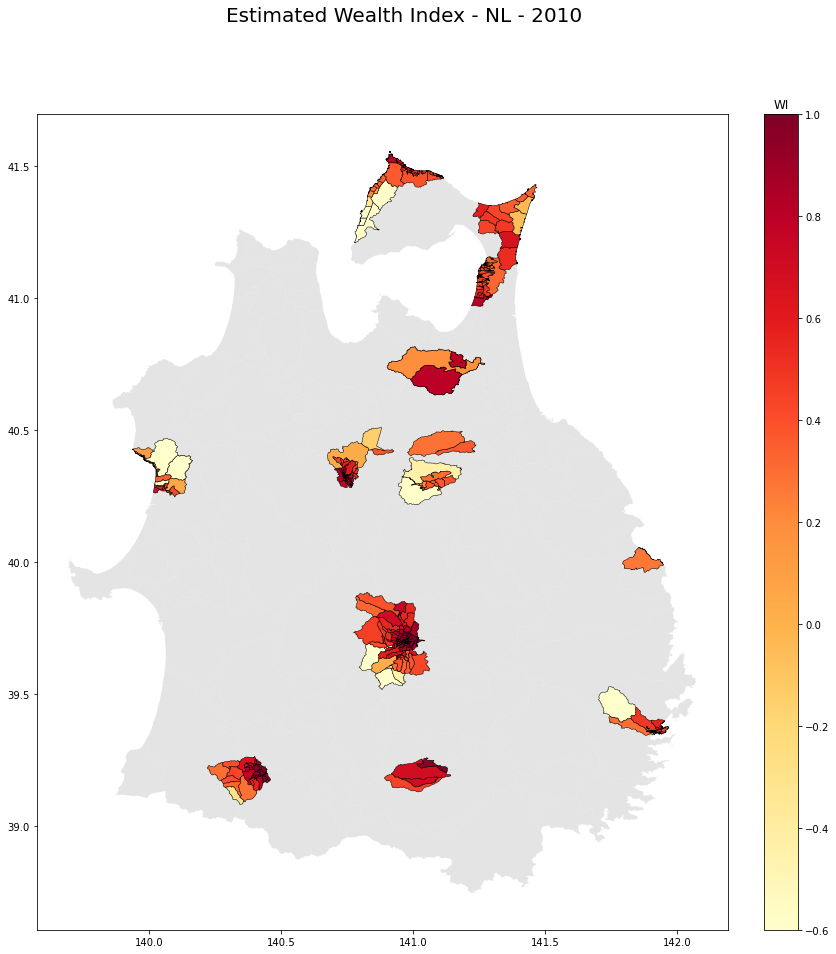

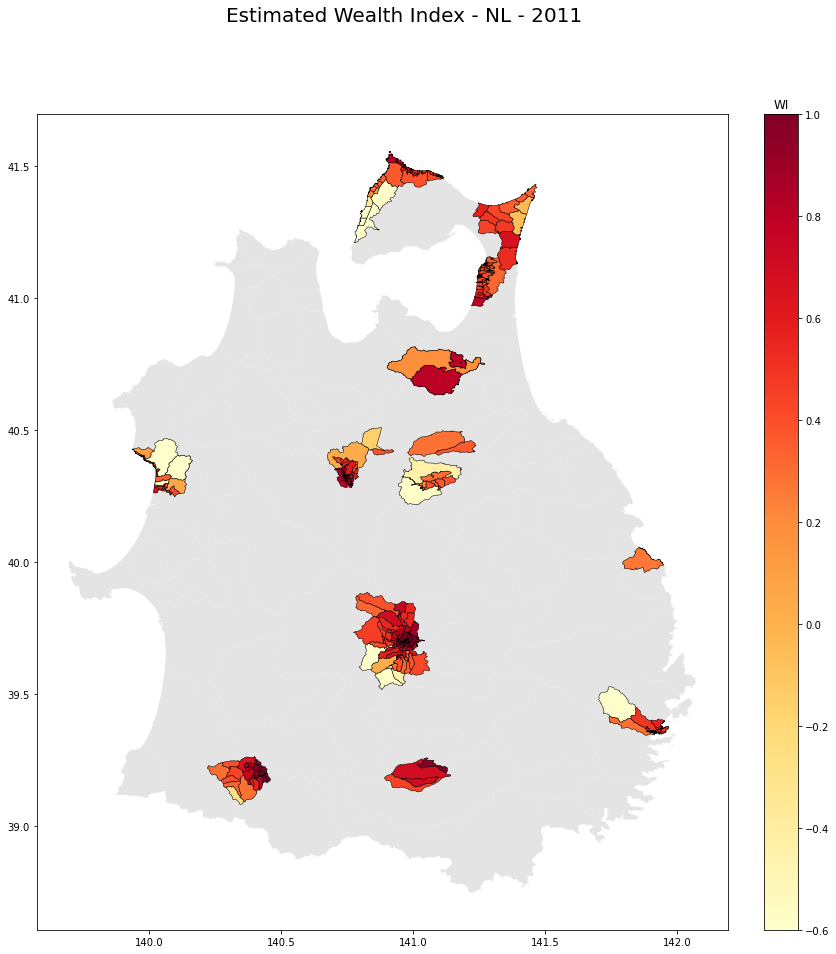

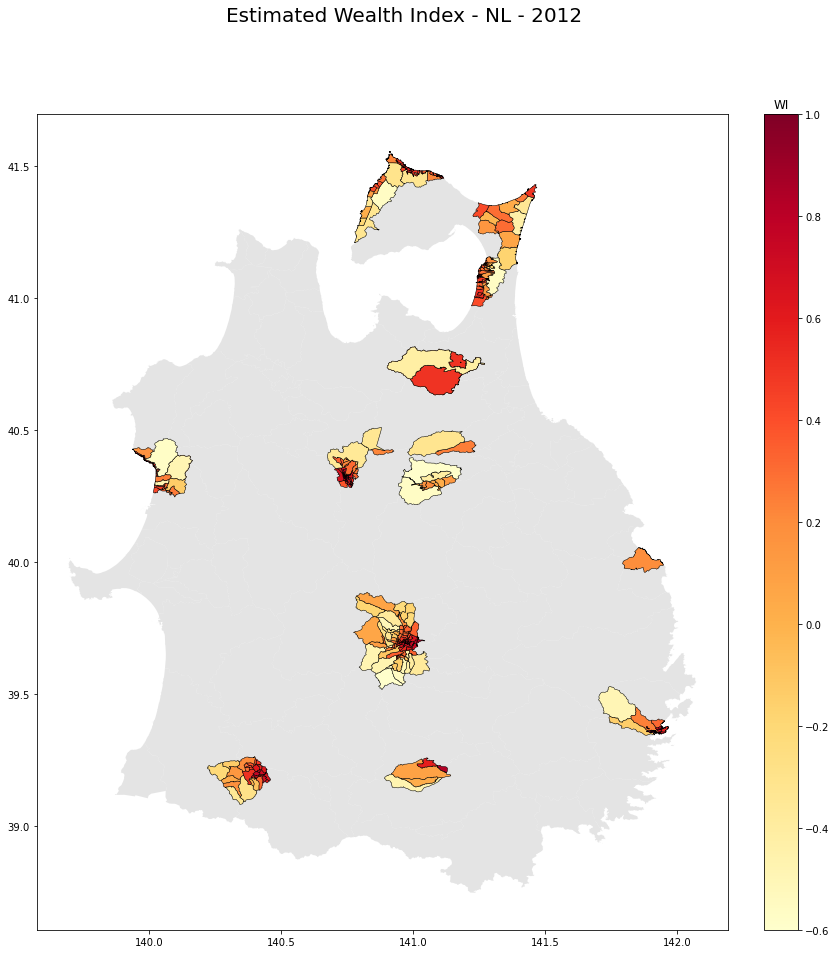

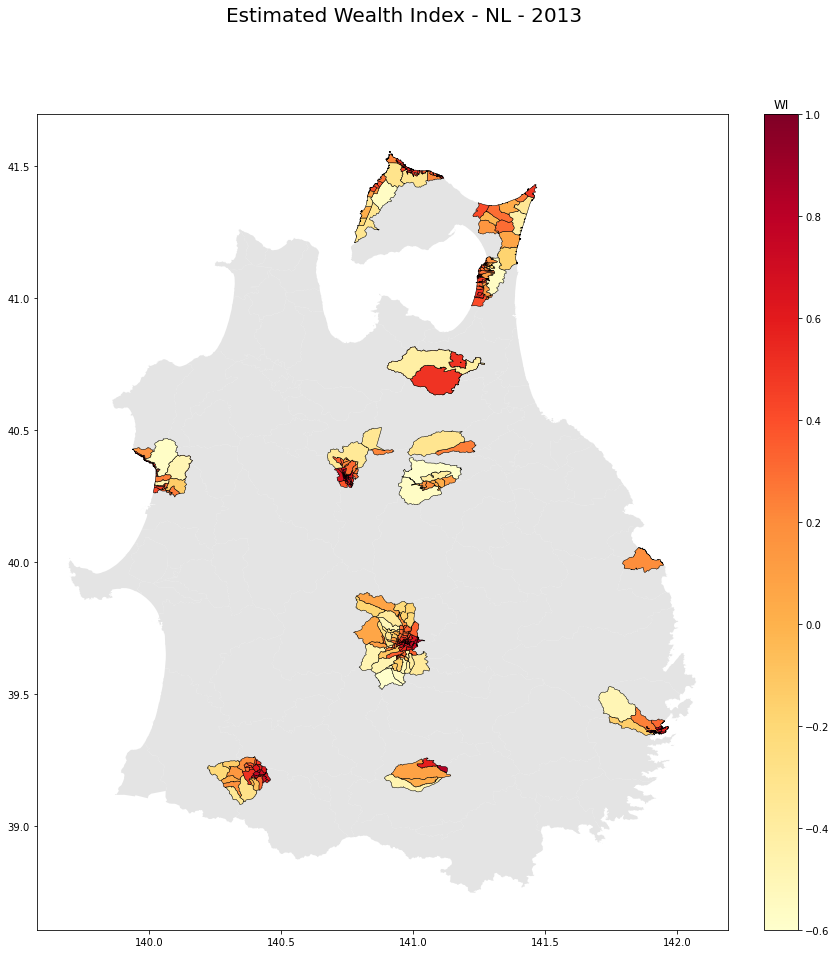

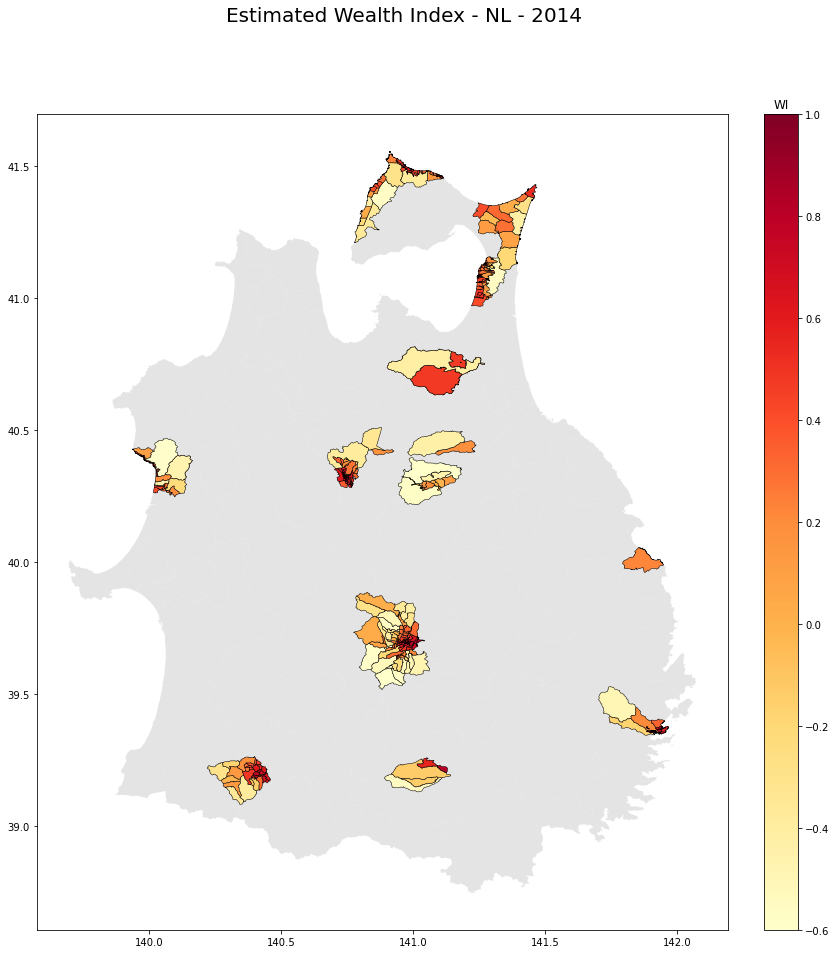

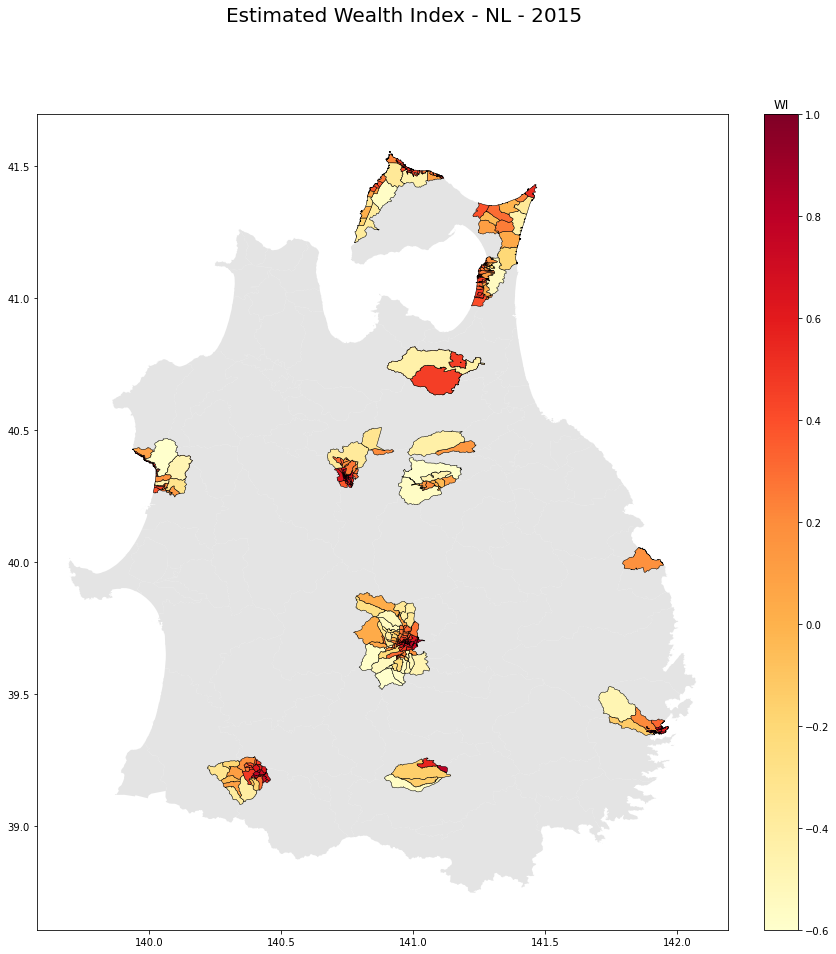

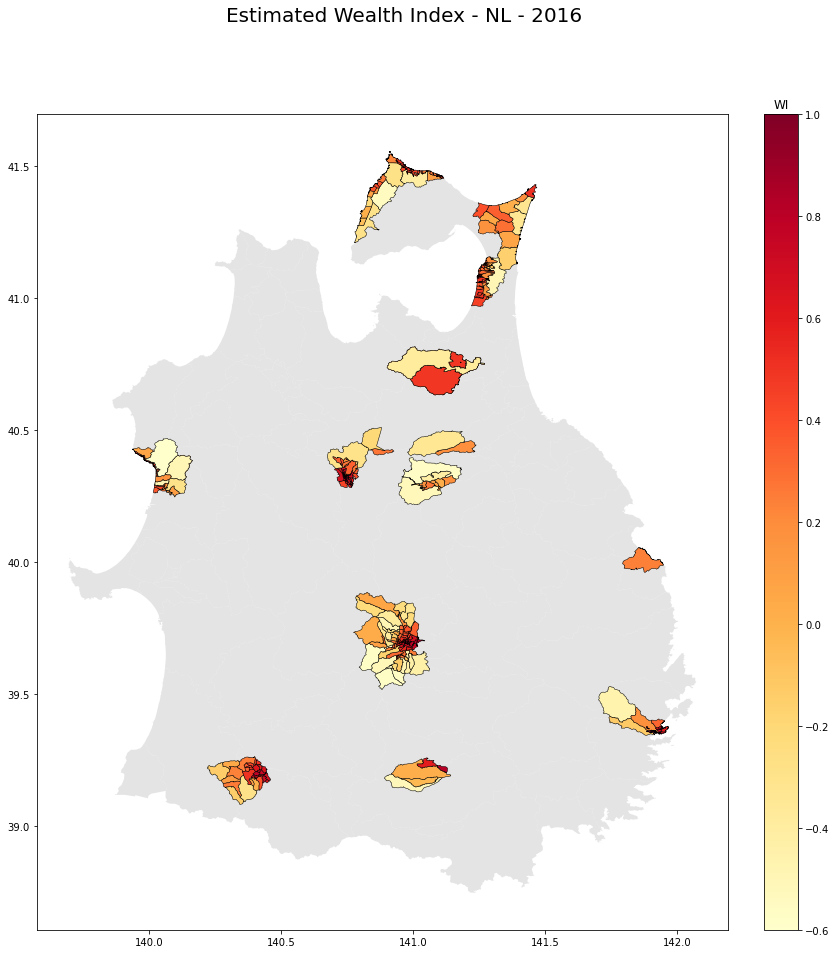

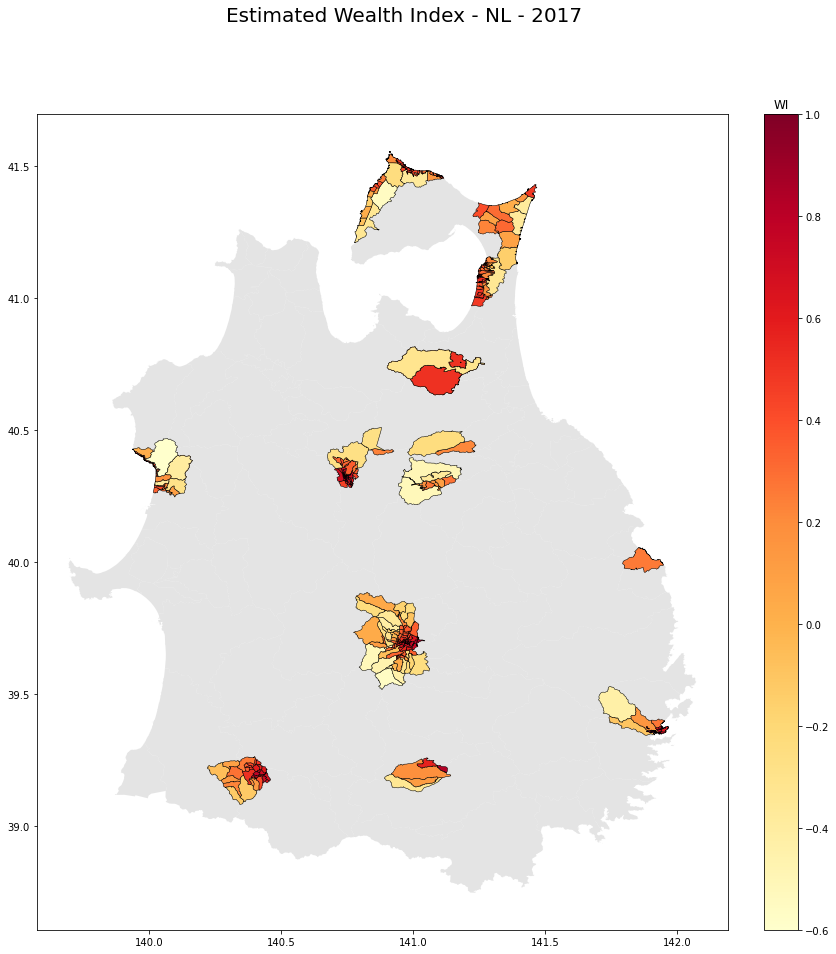

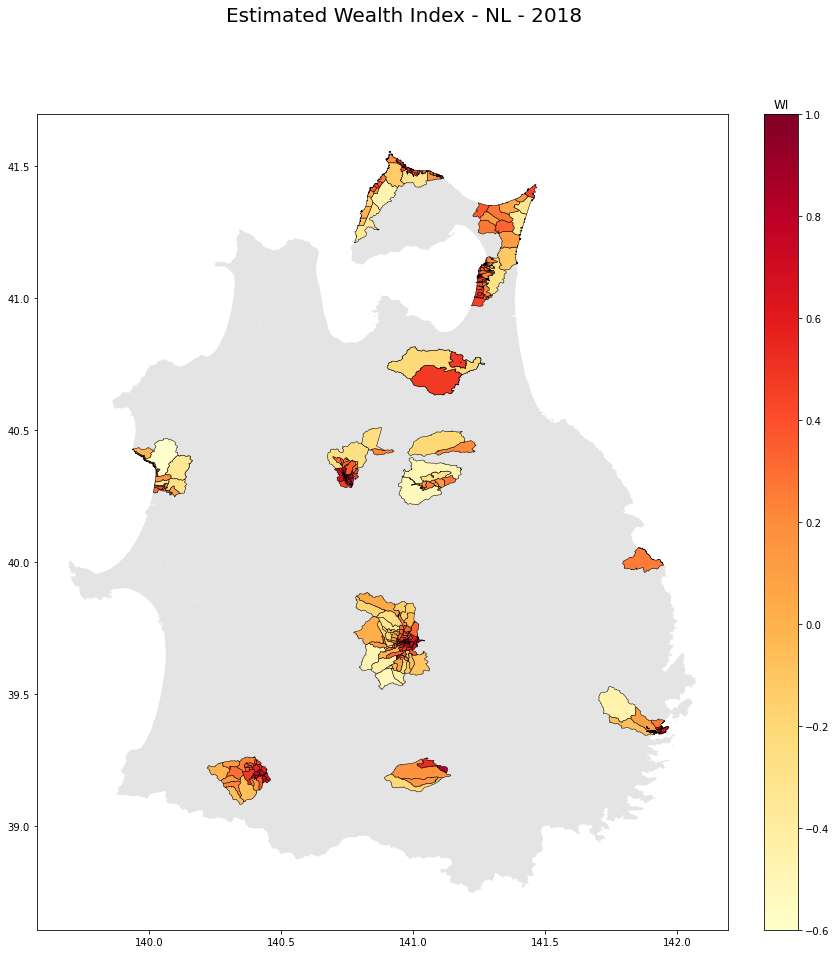

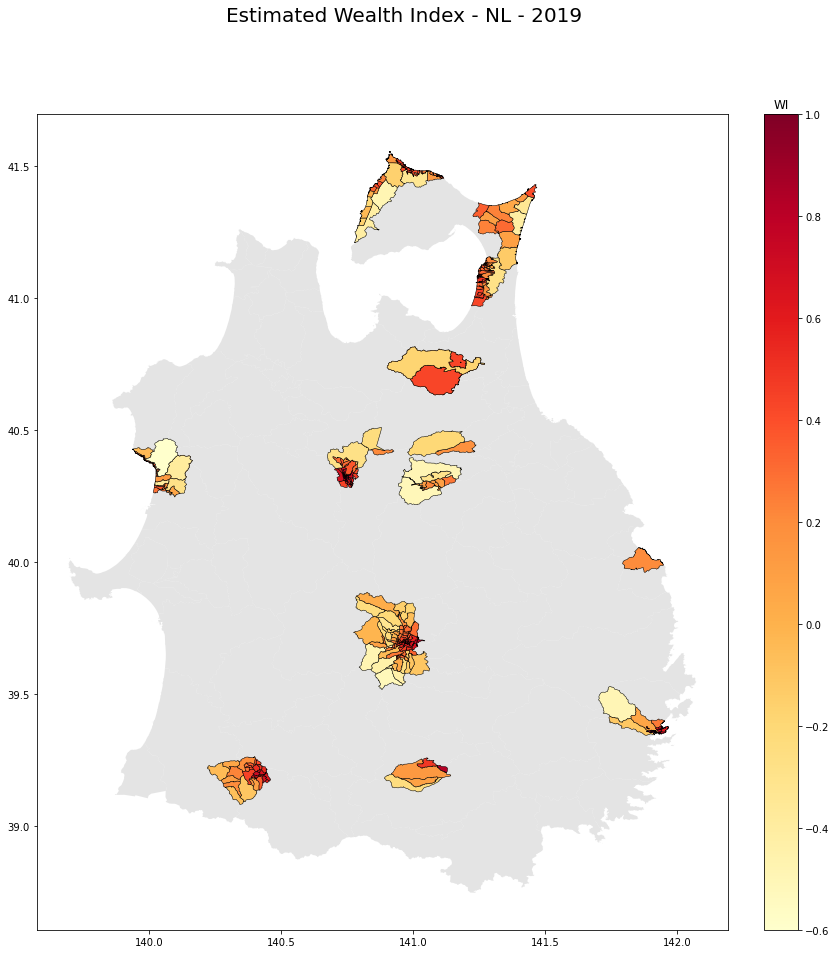

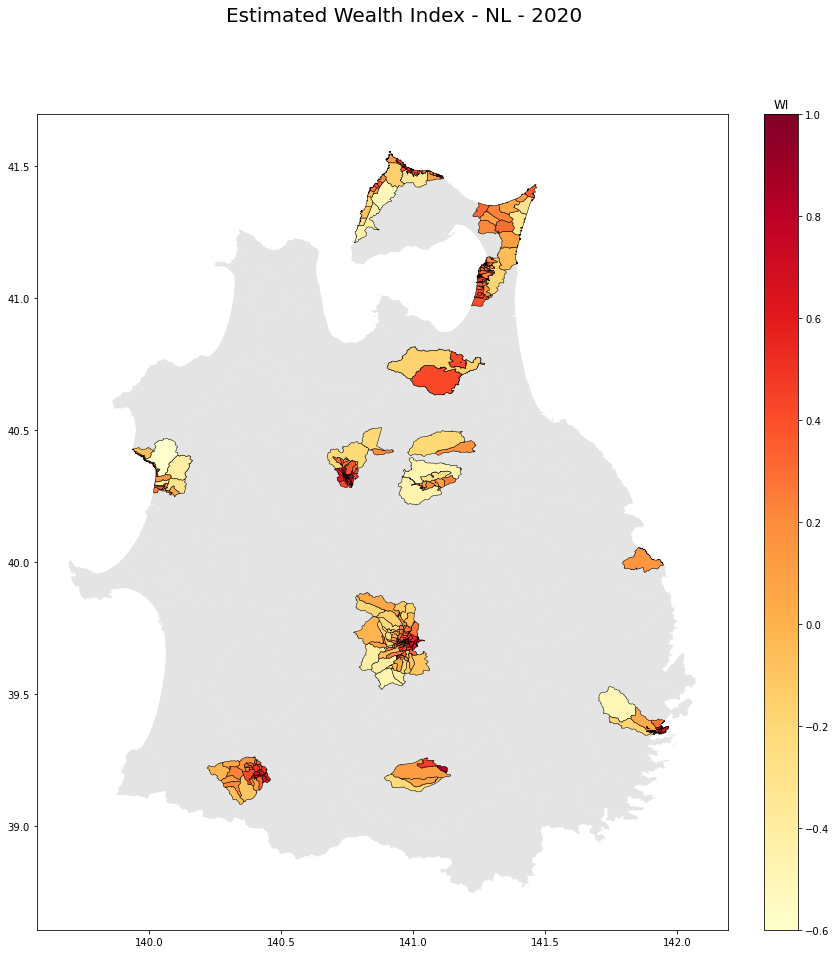

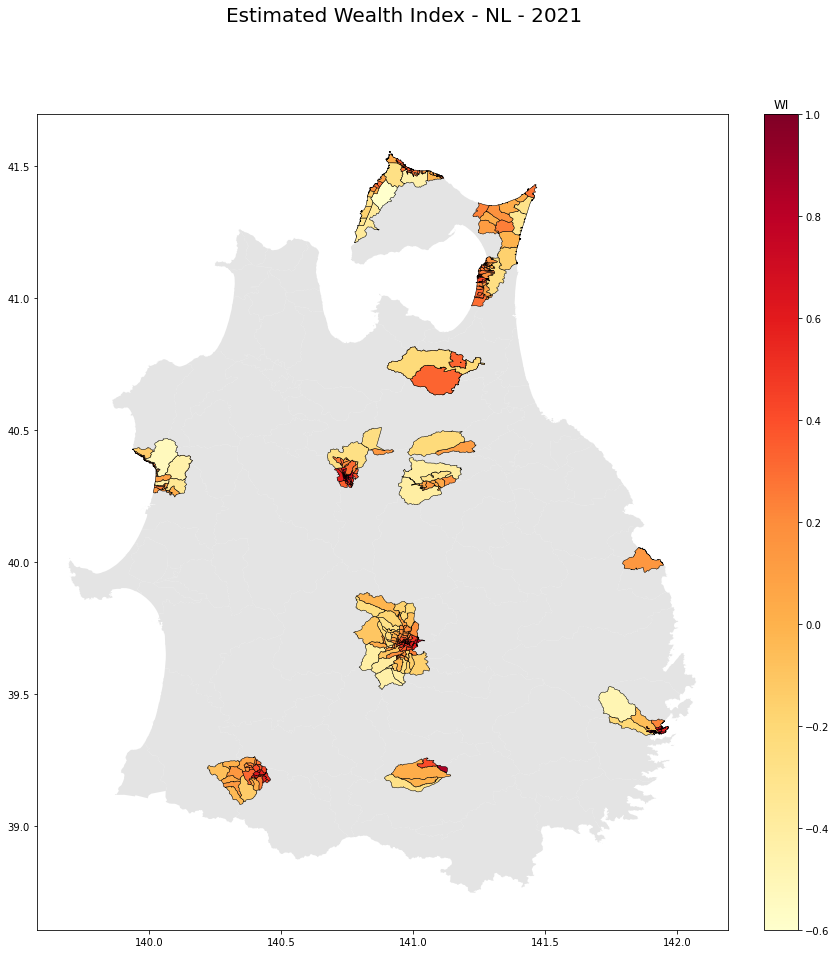

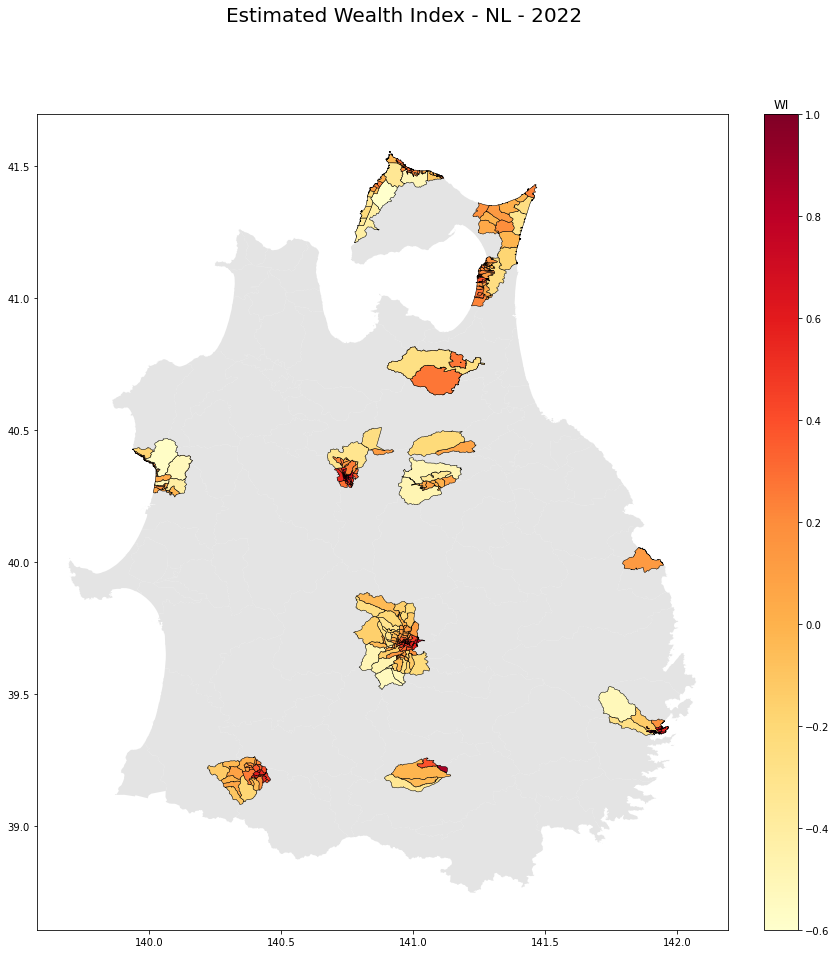

In [9]:
range_years= [str(col)  for col in np.arange(2000, 2022+1, 1)] #'2000', '2001', '2002', '2003','2004', ... '2022']
for year_estimated in range_years:
    fig, ax = plt.subplots(figsize=(15, 15))   
    cmap = plt.cm.get_cmap('YlOrRd')
    plt.suptitle(f'Estimated Wealth Index - NL - {year_estimated}', fontsize=20)

    gdp_muni['geometry'].plot(ax=ax,facecolor='lightgray',alpha=0.6) #contourn Region 
    #census tracts
    gpd_DHS_NL_merged.plot(column=year_estimated, ax=ax, cmap=cmap,linewidth=0.5,edgecolor='black')#color-fill  

    # axs[0].set_axis_off()
    ax.axes.get_xaxis().set_visible(True)
    ax.axes.get_yaxis().set_visible(True) 

    #plot colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=-0.6, vmax=1))
    sm._A = []
    divider = make_axes_locatable(axes=ax)
    cax = divider.append_axes("right", size="5%", pad=0.5)
    cbar = fig.colorbar(sm, cax=cax)#,  ticks=[1,2,3,4,5]
    cbar.ax.set_title('WI')
    
    
    plt.savefig(fname=os.path.join(f'figs/JP/fig6_{year_estimated}-NL.png'), dpi=100, facecolor='w', edgecolor='w', transparent=True)        
    # plt.close()
    plt.show() 


### avg. by municipality 

In [11]:
gpd_DHS_NL_merged['KEY_municip']= gpd_DHS_NL_merged['KEY_CODE'].str[0:4] 
gpd_DHS_NL_merged.head()

,KEY_CODE,geometry,lon,lat,2000,2001,2002,2003,2004,2005,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,KEY_municip
0,53490130,"POLYGON ((139.94938 40.41965, 139.95030 40.419...",139.957490,40.411904,0.436647,0.586111,0.399894,0.627362,0.617766,0.617766,...,0.481021,0.484239,0.470666,0.431068,0.425711,0.404649,0.417397,0.423203,0.450991,5349
1,53490140,"POLYGON ((139.96878 40.40512, 139.96832 40.404...",139.966268,40.405155,0.495150,0.607970,0.499265,0.580071,0.595839,0.595839,...,0.585033,0.582222,0.552794,0.508216,0.497827,0.481603,0.480813,0.484287,0.505059,5349
2,53490150,"POLYGON ((139.96878 40.40512, 139.96902 40.404...",139.968620,40.403846,0.519354,0.609749,0.515210,0.573711,0.594100,0.594100,...,0.600637,0.594170,0.562043,0.513695,0.506523,0.490670,0.491242,0.495436,0.515844,5349
3,53490160,"POLYGON ((139.97668 40.40509, 139.97664 40.404...",139.972210,40.403452,0.531161,0.601399,0.531254,0.556951,0.577326,0.577326,...,0.589259,0.583469,0.547520,0.498256,0.494634,0.482452,0.483000,0.490969,0.512985,5349
4,53490170,"POLYGON ((139.97231 40.40224, 139.97298 40.401...",139.972273,40.400782,0.536996,0.600334,0.529380,0.545971,0.580617,0.580617,...,0.614026,0.608344,0.570149,0.521755,0.517002,0.502062,0.500653,0.507182,0.524892,5349


In [12]:
range_years= [str(col)  for col in np.arange(2000, 2022+1, 1)] #'2000', '2001', '2002', '2003','2004', ... '2022']


DHS_muni_NL=gpd_DHS_NL_merged.groupby('KEY_municip',as_index=True)[range_years].mean()   


#### Average WI estimated values by municipalities

In [14]:

DHS_muni_NL.to_csv(os.path.join(PATH_ESTIMATED, 'JP_muni_avg_NL.csv'), sep=",", quotechar='"', encoding="utf-8") 